# **Step 1: Loading and Understanding Data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Amazon_Reviews.csv', engine='python')

In [ ]:
df.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"


In [ ]:
# Keep only useful columns
df = df[['Rating', 'Review Title', 'Review Text', 'Review Date', 'Country']]

In [ ]:
# Combine title + text into one field
df['review_full'] = df['Review Title'].fillna('') + " " + df['Review Text'].fillna('')

In [ ]:
df['review_full']

,review_full
0,A Store That Doesn't Want to Sell Anything I r...
1,Had multiple orders one turned up and… Had mul...
2,I informed these reprobates I informed these r...
3,Advertise one price then increase it on websit...
4,If I could give a lower rate I would If I coul...
...,...
21209,"Fast!! I have had perfect order fulfillment, a..."
21210,Consistently Excellent I have had perfect orde...
21211,Good prices but delivery can take time :( I al...
21212,World-class online shopping I have placed an a...


In [ ]:
df.head()


,Rating,Review Title,Review Text,Review Date,Country,review_full
0,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",2024-09-16T13:44:26.000Z,US,A Store That Doesn't Want to Sell Anything I r...
1,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,2024-09-16T18:26:46.000Z,GB,Had multiple orders one turned up and… Had mul...
2,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,2024-09-16T21:47:39.000Z,GB,I informed these reprobates I informed these r...
3,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,2024-09-17T07:15:49.000Z,AU,Advertise one price then increase it on websit...
4,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,2024-09-16T18:37:17.000Z,GB,If I could give a lower rate I would If I coul...


In [ ]:
# Function to map rating → sentiment
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "Negative"
    elif r == 3:
        return "Neutral"
    elif r in [4, 5]:
        return "Positive"
    else:
        return "Unknown"

In [ ]:
# Extract numeric rating safely (1–5)
df['Rating_num'] = df['Rating'].str.extract(r'(\d)').astype(float).astype('Int64')


In [ ]:
# Drop rows where rating could not be extracted
df = df.dropna(subset=['Rating_num'])

In [ ]:
# Convert back to int for clean use
df['Rating_num'] = df['Rating_num'].astype(int)

In [ ]:
# Apply sentiment mapping
df['Sentiment'] = df['Rating_num'].apply(rating_to_sentiment)

# Check results
print(df[['Rating', 'Rating_num', 'Sentiment']].head(10))
print(df['Sentiment'].value_counts())

                   Rating  Rating_num Sentiment
0  Rated 1 out of 5 stars           1  Negative
1  Rated 1 out of 5 stars           1  Negative
2  Rated 1 out of 5 stars           1  Negative
3  Rated 1 out of 5 stars           1  Negative
4  Rated 1 out of 5 stars           1  Negative
5  Rated 1 out of 5 stars           1  Negative
6  Rated 1 out of 5 stars           1  Negative
7  Rated 5 out of 5 stars           5  Positive
8  Rated 1 out of 5 stars           1  Negative
9  Rated 5 out of 5 stars           5  Positive
Sentiment
Negative    14350
Positive     5820
Neutral       885
Name: count, dtype: int64


In [ ]:
df.head()

,Rating,Review Title,Review Text,Review Date,Country,review_full,Rating_num,Sentiment
0,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",2024-09-16T13:44:26.000Z,US,A Store That Doesn't Want to Sell Anything I r...,1,Negative
1,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,2024-09-16T18:26:46.000Z,GB,Had multiple orders one turned up and… Had mul...,1,Negative
2,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,2024-09-16T21:47:39.000Z,GB,I informed these reprobates I informed these r...,1,Negative
3,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,2024-09-17T07:15:49.000Z,AU,Advertise one price then increase it on websit...,1,Negative
4,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,2024-09-16T18:37:17.000Z,GB,If I could give a lower rate I would If I coul...,1,Negative


# **Step 2: Clean the review text.**

Converts to lowercase

Removes HTML tags, URLs, punctuation, numbers

Tokenizes into words

Removes stopwords (e.g., “the”, “and”, “is”)

Lemmatizes (turns “running” → “run”, “better” → “good”)

Joins back into a cleaned string

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Function to clean review text
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    tokens = nltk.word_tokenize(text)  # tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # remove stopwords & lemmatize
    return " ".join(tokens)

In [ ]:
# Apply cleaning
df['Cleaned_Review'] = df['review_full'].apply(clean_text)

In [ ]:
print(df[['review_full', 'Cleaned_Review']].head(10))


                                         review_full  \
0  A Store That Doesn't Want to Sell Anything I r...   
1  Had multiple orders one turned up and… Had mul...   
2  I informed these reprobates I informed these r...   
3  Advertise one price then increase it on websit...   
4  If I could give a lower rate I would If I coul...   
5  Terrible, I had to hang up and call back  Terr...   
6  Yet again  Amazon has a way of tainting a grea...   
7  I love amazon I love amazon! I use it for half...   
8  I applied for a job with Amazon I applied for ...   
9  I had a great experience with their… I had a g...   

                                      Cleaned_Review  
0  store doesnt want sell anything registered web...  
1  multiple order one turned and… multiple order ...  
2  informed reprobate informed reprobate would go...  
3  advertise one price increase website bought am...  
4  could give lower rate would could give lower r...  
5  terrible hang call back terrible get customer ... 

# Step3: Emotion Detection with NRC Emotion Lexicon

In [ ]:
!pip install nrclex tqdm

In [ ]:
# Install once (in your environment/terminal)
# pip install nrclex tqdm

from nrclex import NRCLex
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# The 8 primary emotions in NRC
EMOTIONS = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

def score_emotions_nrc(text: str) -> dict:
    """
    Returns normalized emotion scores (0..1) across the 8 NRC emotions.
    If a review has no lexicon hits, returns all zeros.
    """
    if not isinstance(text, str) or not text.strip():
        return {e: 0.0 for e in EMOTIONS}

    nrc = NRCLex(text)
    raw = {e: float(nrc.raw_emotion_scores.get(e, 0)) for e in EMOTIONS}
    total = sum(raw.values())
    if total > 0:
        return {e: v / total for e, v in raw.items()}
    else:
        return raw  # all zeros


In [ ]:
tqdm.pandas(desc="Scoring emotions")
emotion_dicts = df["Cleaned_Review"].progress_apply(score_emotions_nrc)

# Expand dicts into columns
emo_df = pd.DataFrame(list(emotion_dicts)).fillna(0.0)
emo_df.columns = [f"emo_{c}" for c in emo_df.columns]

# Attach to original df
df = pd.concat([df, emo_df], axis=1)

# Dominant emotion per review (tie → first max)
emo_cols = [c for c in df.columns if c.startswith("emo_")]
df["Dominant_Emotion"] = emo_df.idxmax(axis=1).str.replace("emo_", "", regex=False)

print(df[["Sentiment", "Dominant_Emotion"] + emo_cols].head())


Scoring emotions: 100%|██████████| 21055/21055 [00:19<00:00, 1087.01it/s]


  Sentiment Dominant_Emotion  emo_anger  emo_anticipation  emo_disgust  \
0  Negative     anticipation   0.055556          0.277778     0.055556   
1  Negative            anger   0.200000          0.200000     0.200000   
2  Negative     anticipation   0.000000          0.250000     0.125000   
3  Negative          sadness   0.000000          0.166667     0.000000   
4  Negative          sadness   0.000000          0.100000     0.000000   

   emo_fear   emo_joy  emo_sadness  emo_surprise  emo_trust  
0  0.055556  0.166667     0.000000      0.111111   0.277778  
1  0.200000  0.000000     0.200000      0.000000   0.000000  
2  0.125000  0.000000     0.250000      0.000000   0.250000  
3  0.083333  0.166667     0.333333      0.083333   0.166667  
4  0.000000  0.100000     0.400000      0.000000   0.400000  


In [ ]:
# Overall distribution of dominant emotions
print(df["Dominant_Emotion"].value_counts(dropna=False))
print("\nMean emotion intensity (0..1) across the dataset:")
print(df[emo_cols].mean().sort_values(ascending=False).round(3))


Dominant_Emotion
anticipation    8420
trust           4151
anger           3556
joy             1823
sadness         1338
fear            1095
disgust          557
NaN              153
surprise         115
Name: count, dtype: int64

Mean emotion intensity (0..1) across the dataset:
emo_anticipation    0.220
emo_trust           0.207
emo_joy             0.129
emo_sadness         0.108
emo_anger           0.081
emo_fear            0.081
emo_disgust         0.063
emo_surprise        0.062
dtype: float64


/tmp/ipython-input-2957578754.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="Review Date", freq="M"))[emo_cols]


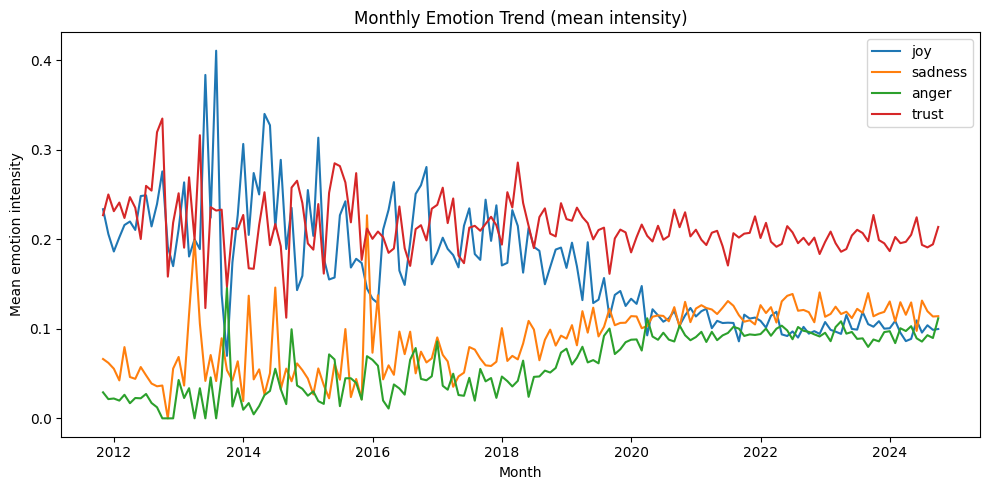


Mean emotion intensity by Country (top 10):
         emo_anger  emo_anticipation  emo_disgust  emo_fear  emo_joy  \
Country                                                                
CA           0.091             0.218        0.074     0.083    0.122   
DK           0.090             0.188        0.053     0.093    0.113   
IE           0.087             0.203        0.070     0.081    0.107   
US           0.086             0.218        0.064     0.082    0.128   
GB           0.080             0.230        0.065     0.085    0.123   
IN           0.079             0.231        0.075     0.060    0.132   
DE           0.072             0.219        0.050     0.077    0.140   
AU           0.070             0.184        0.073     0.073    0.135   
NL           0.069             0.218        0.053     0.073    0.123   
IT           0.041             0.206        0.029     0.062    0.170   

         emo_sadness  emo_surprise  emo_trust  
Country                                   

In [ ]:
# If you have Review Date and Country, this reveals trends
df["Review Date"] = pd.to_datetime(df["Review Date"], errors="coerce")

# Monthly emotion trend (mean intensities)
monthly = (
    df.dropna(subset=["Review Date"])
      .groupby(pd.Grouper(key="Review Date", freq="M"))[emo_cols]
      .mean()
)

# Plot a few key emotions
plt.figure(figsize=(10,5))
for c in ["emo_joy", "emo_sadness", "emo_anger", "emo_trust"]:
    plt.plot(monthly.index, monthly[c], label=c.replace("emo_",""))
plt.title("Monthly Emotion Trend (mean intensity)")
plt.xlabel("Month")
plt.ylabel("Mean emotion intensity")
plt.legend()
plt.tight_layout()
plt.show()

# Country-level snapshot (top 10 countries by count)
top_countries = df["Country"].value_counts().head(10).index
country_emotions = (
    df[df["Country"].isin(top_countries)]
      .groupby("Country")[emo_cols]
      .mean()
      .sort_values("emo_anger", ascending=False)
      .round(3)
)
print("\nMean emotion intensity by Country (top 10):")
print(country_emotions)


In [ ]:
out_cols = ["Rating", "Sentiment", "Dominant_Emotion"] + emo_cols + ["review_full", "Cleaned_Review", "Review Date", "Country"]
df[out_cols].to_csv("amazon_emotion_scored.csv", index=False)
print("Saved: amazon_emotion_scored.csv")


Saved: amazon_emotion_scored.csv


## **Step 4: Exploratory Data Analysis (EDA) on Sentiment**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Shape and column info
print("Dataset shape:", df.shape)
print("\nColumn types:\n", df.dtypes)

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Dataset shape: (21208, 18)

Column types:
 Rating               object
Review Title         object
Review Text          object
Review Date          object
Country              object
review_full          object
Rating_num          float64
Sentiment            object
Cleaned_Review       object
emo_anger           float64
emo_anticipation    float64
emo_disgust         float64
emo_fear            float64
emo_joy             float64
emo_sadness         float64
emo_surprise        float64
emo_trust           float64
Dominant_Emotion     object
dtype: object

Missing values:
 Rating              153
Review Title        153
Review Text         153
Review Date         153
Country             154
review_full         153
Rating_num          153
Sentiment           153
Cleaned_Review      153
emo_anger           153
emo_anticipation    153
emo_disgust         153
emo_fear            153
emo_joy             153
emo_sadness         153
emo_surprise        153
emo_trust           153
Dominant_Emot

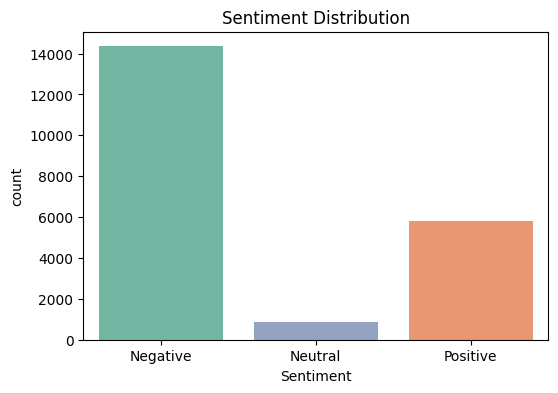

In [ ]:
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(
    x='Sentiment',
    hue='Sentiment',
    data=df,
    order=['Negative','Neutral','Positive'],
    palette="Set2",
    legend=False
)
plt.title("Sentiment Distribution")
plt.show()


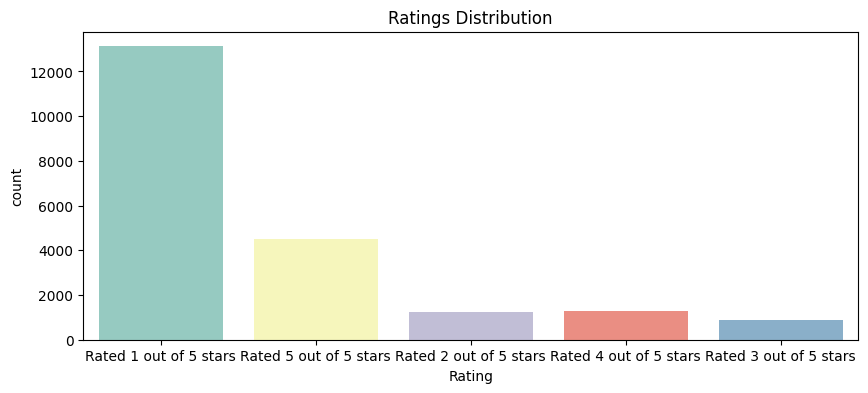

In [ ]:
# Ratings distribution
plt.figure(figsize=(10,4))
sns.countplot(
    x='Rating',
    hue='Rating',
    data=df,
    palette="Set3",
    legend=False
)
plt.title("Ratings Distribution")
plt.show()

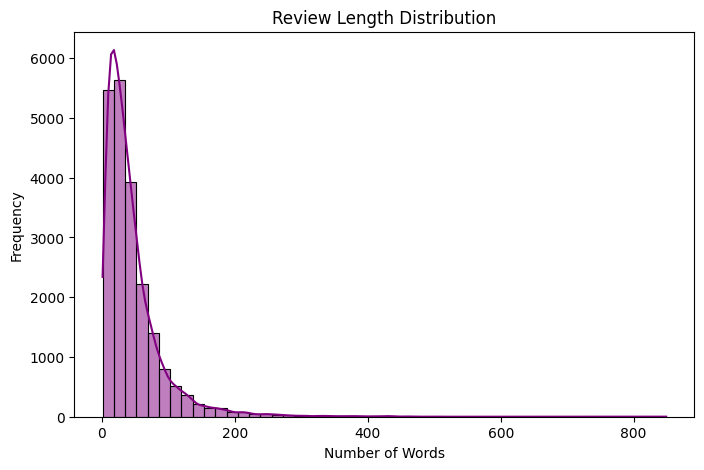

In [ ]:
# 3. Review length analysis
df['review_length'] = df['Cleaned_Review'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True, color="purple")
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from collections import Counter

In [ ]:
# 4. Top frequent words per sentiment
def get_top_words(sentiment, n=20):
    words = " ".join(df[df['Sentiment']==sentiment]['Cleaned_Review']).split()
    return Counter(words).most_common(n)

In [ ]:
print("🔴 Top Negative words:", get_top_words("Negative"))
print("🟡 Top Neutral words:", get_top_words("Neutral"))
print("🟢 Top Positive words:", get_top_words("Positive"))

🔴 Top Negative words: [('amazon', 29203), ('customer', 12360), ('service', 11175), ('item', 8739), ('’', 8591), ('delivery', 7771), ('order', 7186), ('day', 7068), ('time', 6983), ('get', 6744), ('account', 5427), ('prime', 5090), ('refund', 5019), ('would', 4527), ('one', 4268), ('company', 4254), ('never', 4186), ('money', 3972), ('product', 3825), ('even', 3746)]
🟡 Top Neutral words: [('amazon', 1257), ('delivery', 450), ('item', 403), ('service', 391), ('customer', 367), ('good', 349), ('order', 341), ('time', 337), ('prime', 317), ('get', 312), ('day', 311), ('product', 303), ('’', 267), ('review', 212), ('like', 201), ('one', 188), ('shipping', 185), ('would', 182), ('price', 168), ('dont', 165)]
🟢 Top Positive words: [('amazon', 6052), ('service', 2830), ('great', 2018), ('customer', 1888), ('good', 1797), ('always', 1789), ('delivery', 1467), ('time', 1395), ('product', 1264), ('love', 1255), ('item', 1237), ('prime', 1160), ('best', 1148), ('company', 1005), ('price', 1003), (

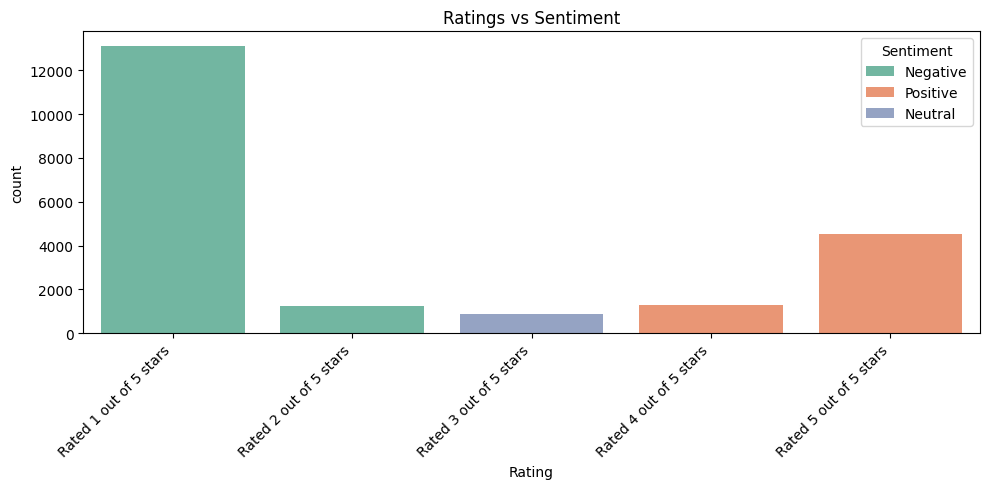

In [ ]:
#Sentiment vs Rating
plt.figure(figsize=(10,5))
# Drop rows with missing 'Rating' before sorting
df_cleaned_rating = df.dropna(subset=['Rating'])
sns.countplot(x='Rating', hue='Sentiment', data=df_cleaned_rating,
              order=sorted(df_cleaned_rating['Rating'].unique()), palette="Set2")
plt.title("Ratings vs Sentiment")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

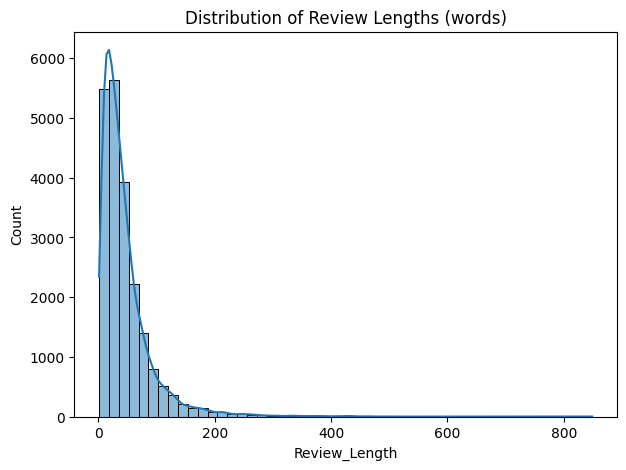

/tmp/ipython-input-3978594824.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Review_Length', data=df, palette="Set2")


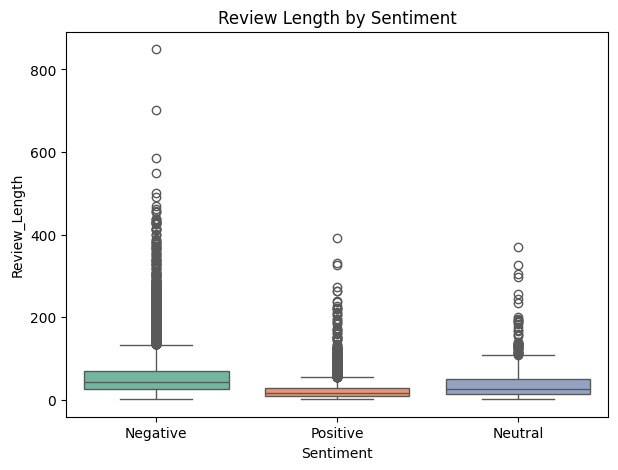

In [ ]:
#Review Length Analysis
df['Review_Length'] = df['Cleaned_Review'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(7,5))
sns.histplot(df['Review_Length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths (words)")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x='Sentiment', y='Review_Length', data=df, palette="Set2")
plt.title("Review Length by Sentiment")
plt.show()

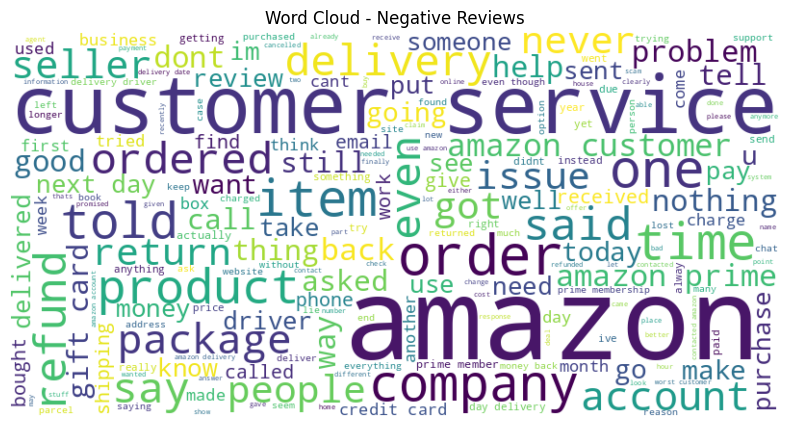

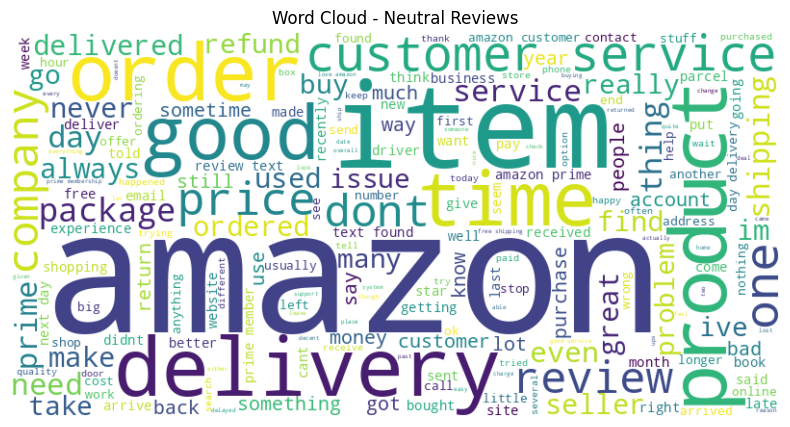

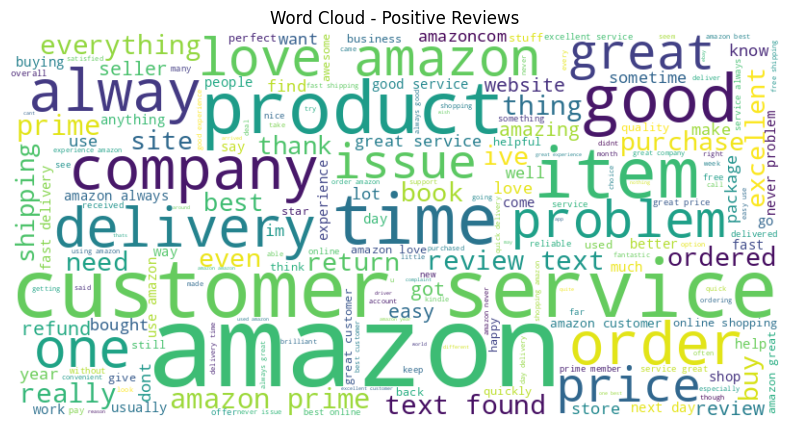

In [ ]:
#Word Clouds
from wordcloud import WordCloud

for sentiment in ['Negative','Neutral','Positive']:
    text = " ".join(df[df['Sentiment']==sentiment]['Cleaned_Review'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment} Reviews")
    plt.show()


In [ ]:
from collections import Counter
from nltk.util import ngrams

def get_top_ngrams(texts, n=2, top=15):
    all_words = " ".join(texts).split()
    n_grams = ngrams(all_words, n)
    return Counter(n_grams).most_common(top)

print("🔴 Top Negative Bigrams:", get_top_ngrams(df[df['Sentiment']=="Negative"]['Cleaned_Review'], 2))
print("🟡 Top Neutral Bigrams:", get_top_ngrams(df[df['Sentiment']=="Neutral"]['Cleaned_Review'], 2))
print("🟢 Top Positive Bigrams:", get_top_ngrams(df[df['Sentiment']=="Positive"]['Cleaned_Review'], 2))


🔴 Top Negative Bigrams: [(('customer', 'service'), 7581), (('amazon', 'customer'), 1315), (('amazon', 'prime'), 1300), (('gift', 'card'), 1089), (('next', 'day'), 1012), (('credit', 'card'), 795), (('prime', 'member'), 706), (('day', 'delivery'), 698), (('prime', 'membership'), 635), (('delivery', 'driver'), 578), (('money', 'back'), 546), (('get', 'refund'), 546), (('even', 'though'), 531), (('amazon', 'delivery'), 518), (('amazon', 'account'), 517)]
🟡 Top Neutral Bigrams: [(('customer', 'service'), 184), (('amazon', 'prime'), 69), (('review', 'text'), 58), (('text', 'found'), 58), (('prime', 'member'), 49), (('next', 'day'), 48), (('amazon', 'customer'), 47), (('day', 'delivery'), 44), (('prime', 'membership'), 34), (('good', 'service'), 31), (('free', 'shipping'), 29), (('love', 'amazon'), 29), (('amazon', 'great'), 28), (('delivery', 'service'), 28), (('delivery', 'date'), 28)]
🟢 Top Positive Bigrams: [(('customer', 'service'), 1237), (('love', 'amazon'), 486), (('amazon', 'prime')

# **Step 5: Feature Engineering**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Features and labels
X = df['Cleaned_Review']
y = df['Sentiment']

In [ ]:
# Features and labels (ensure no NaNs in X or y)
X = df['Cleaned_Review'].dropna()
y = df['Sentiment'].loc[X.index] # Align y with the cleaned X index

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
print("Shape of TF-IDF Train:", X_train_tfidf.shape)
print("Shape of TF-IDF Test:", X_test_tfidf.shape)

Shape of TF-IDF Train: (16844, 5000)
Shape of TF-IDF Test: (4211, 5000)


# **Baseline Model (Logistic Regression)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_test_tfidf)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Negative       0.92      0.98      0.95      2870
     Neutral       0.25      0.02      0.03       177
    Positive       0.90      0.88      0.89      1164

    accuracy                           0.91      4211
   macro avg       0.69      0.63      0.62      4211
weighted avg       0.89      0.91      0.89      4211

Confusion Matrix:
 [[2811    4   55]
 [ 111    3   63]
 [ 129    5 1030]]


# **Step 6: Visualization of Performance**

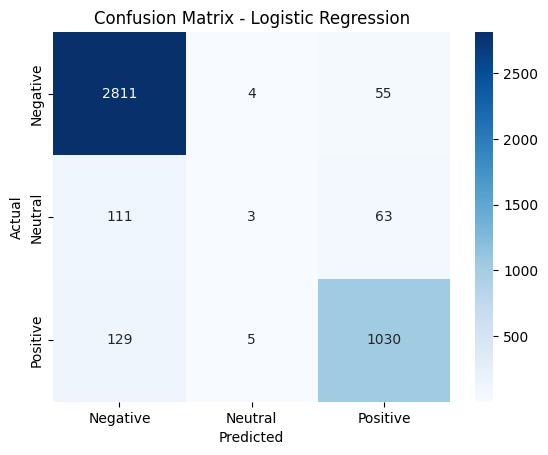

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred, labels=["Negative","Neutral","Positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Neutral","Positive"], yticklabels=["Negative","Neutral","Positive"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
